# Project: Investigate a Dataset (TMDB Movies Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#refrences">Refrences</a></li>
</ul>

<a id='intro'></a>
## Introduction
+ TDMb dataset consists of about 10000 rows of data about 10000 movie titles and their information that are of different types , some are quantitative like revenue and budget and others qualitative like directors, cast and production companies.
+ After the first look, questions relating these variables are raised around the concept of what are factors that make a successful movie.
+ Generating questions related different variables was the first step, followed by assessing data by inspecting types , missed , unproper  data and then cleaning and restructuring of data to be consistent for analysis.
+ The next step was investing our questions about data , finding relations and answering our questions and then Extacting conclusions. 

## Possible questions:
[1-Release year questions](#1-Release-year-questions)
   * [1.1-what is the describtion of movies release per year ?](#1.1-what-is-the-describtion-of-movies-release-per-year-?)
    
[2-Release date questions](#2-Release-date-questions)
   + [2.1-what is the most popular month for movie release? is there correlation with revenue?](#2.1-what-is-the-most-popular-month-for-movie-release?-is-there-correlation-with-revenue?)
   + [2.2-IS there any relation between month of release and revenue?](#2.2-IS-there-any-relation-between-month-of-release-and-revenue?)
   + [2.3-IS there any relation between month of release and popularity?](#2.3-IS-there-any-relation-between-month-of-release-and-popularity?)
   
[3-Runtime questions](#3-Runtime-questions)
   + [3.1-Does movies run time change over years?](#3.1-Does-movies-run-time-change-over-years?)
   + [3.2-What is the longest and shortest movie ?](#3.2-What-is-the-longest-and-shortest-movie-?)
   
[4-Genres questions](#4-Genres-questions)   
   + [4.1-What are the most watched  Genres over years?](#4.1-What-are-the-most-watched--Genres-over-years?)   
   + [4.2-Is there relation between Genres and Budget?](#4.2-Is-there-relation-between-Genres-and-Budget?)
   + [4.3-IS there any relation between Genres and Revenue?](#4.3-IS-there-any-relation-between-Genres-and-Revenue?)
   
[5-Cast questions](#5-Cast-questions)
   + [5.1-who are the top ten actors/actress participated in movies?](#5.1-who-are-the-top-ten-actors/actress-participated-in-movies?)
   + [5.2-Is there any relation between cast and revenue?who are the top ten cast achieving revenue?](#5.2-Is-there-any-relation-between-cast-and-revenue?who-are-the-top-ten-cast-achieving-revenue?)

[6-Directors questions](#6-Directors-questions)
   + [6.1-who are the top ten directors participated in movies?](#6.1-who-are-the-top-ten-directors-participated-in-movies?)
   + [6.2-Is there any relation between director and revenue? who are the top 10 directors with high revenue?](#6.2-Is-there-any-relation-between-director-and-revenue?-who-are-the-top-10-directors-with-high-revenue?)

[7-Revenue questions](#7-Revenue-questions)
   + [7.1-what are the top 10 movies with highest revenue?](#7.1-what-are-the-top-10-movies-with-highest-revenue?)
   + [7.2-Is there any proportional pattern between Revenue and budget?](#7.2-Is-there-any-proportional-pattern-between-Revenue-and-budget?)
   + [7.3-Is there any proportional pattern between Revenue and popularity?](#7.3-Is-there-any-proportional-pattern-between-Revenue-and-popularity?)
   + [7.4-Is there any proportional pattern between Revenue and votes?](#7.4-Is-there-any-proportional-pattern-between-Revenue-and-votes?)
   + [7.5-Is there any proportional pattern between Revenue and Rating?](#7.5-Is-there-any-proportional-pattern-between-Revenue-and-Rating?)
   
[8-Budget questions](#8-Budget-questions)
   + [8.1-what are the top 10 movies with highest Budget?](#8.1-what-are-the-top-10-movies-with-highest-Budget?)
   + [8.2-Is there any proportional pattern between budget and popularity?](#8.2-Is-there-any-proportional-pattern-between-budget-and-popularity?)
   + [8.3-Is there any proportional pattern between budget and votes?](#8.3-Is-there-any-proportional-pattern-between-budget-and-votes?)
   + [8.4-Is there any proportional pattern between budget and release year?](#8.4-Is-there-any-proportional-pattern-between-budget-and-release-year?)

[9-production companies questions](#9-production-companies-questions)
   + [9.1-what are top companies partcipated in movies production?](#9.1-what-are-top-companies-partcipated-in-movies-production?) 
   + [9.2-Is there any relation between production companies and budget?](#9.2-Is-there-any-relation-between-production-companies-and-budget?)
   + [9.3-Is there any relation between production companies and revenue?](#9.3-Is-there-any-relation-between-production-companies-and-revenue?)

In [1]:
#importing libraries.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties and Defects

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> looking for the shape of dataset

In [3]:
df.shape

(10866, 21)

>looking for data types and missing data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

+ There ara a lot of missing data related to ***cast, homepage, director, tagline, keywords, genres, production_companies***
+ The type of release date is object(_we need to convert it to a datetime type_)

> Looking for main descriptive features of data and zero values.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


+ Tere are zero values related to ***budget, revenue, and runtime*** and represent more than **50%** in case of revenue and budget.
+ zero values may represent missed data.
+ Budget and revenue variables are important for analysis logic and dropping such huge data amount (more than 50%) may decrease quality of data analysis as it will affects other variable data that already with no missed data


> + Looking for null values

In [6]:
null_sum = df.isnull().sum()

+ There is null values related to ***imdb_id, cast, director, tagline, keywords, production_companies*** 

> Looking for duplicates

In [7]:
df.duplicated().sum()

1

+ There is only one duplicated row.

> + column names

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Restructuring and Cleaning Data

> To reach my analysis vision i have to mix between cleaning and restructuring, so it is not a straight forward process.

**Restructring Dataframes to avoid effect of missed data**




**1) production companies column  have about 1000 nulls so we will keep it in a separte dataframe (pro_comp_df) to use it in answering questions related to production companies after dropping nulls also, it will be droped from the main dataframe used through analysis.**

In [9]:
pro_comp_df = pd.read_csv('tmdb.csv')

+ (**pro_comp_df**) dataframe will be used during production companies analysis and it is free of null or zero values.



> ***Now, we have to clean our dataframes before completing our data restructuring..***
+ Dropping columns that will not particpate in our analysis and with features not affect movie production over all...
    + N.B  production companies column will be dropped in main dateframe (df) used throug analysis main stream and wil be found in (pro_comp_df) that will be used in analysis related to production companies.
+ There is a small amount of null values that dropping them will not affect dataset consistancy.
+ Dropping duplicates(only one duplicate)

In [10]:
# columns drop lists
df_drop = ['id', 'imdb_id', 'homepage','tagline', 'keywords', 'overview', 'production_companies', 'budget_adj','revenue_adj']
pro_comp_df_drop = ['id', 'imdb_id', 'homepage','tagline', 'keywords', 'overview', 'budget_adj','revenue_adj']  

In [11]:
def cleaning(dataframe, drop):
    
    '''cleaning function for droping nulls zero and unnecessary columns'''
    
    dataframe.drop(drop,axis=1, inplace=True)
    dataframe.dropna(inplace=True)
    dataframe.drop_duplicates(inplace=True)
    return dataframe

cleaning(pro_comp_df, pro_comp_df_drop)
cleaning(df, df_drop)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966


+ Dropping zero values in **runtime** columns to enable extracting the min. movie runtime.

In [12]:
def clean_zero_runtime():
    zero_values_runtime = df[df['runtime'] == 0]
    index = zero_values_runtime.index
    df.drop(index= index, inplace=True)
clean_zero_runtime()

>+ Now let's return to restructuring process...

>**2) To work on release_date column , we have to change date to datetime Type an make a new column with title (release_month) as we will use in analysis.** 

In [13]:
# change date to datetime type..
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month_name()
df.info()  #confirm the new column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10703 non-null  float64       
 1   budget          10703 non-null  int64         
 2   revenue         10703 non-null  int64         
 3   original_title  10703 non-null  object        
 4   cast            10703 non-null  object        
 5   director        10703 non-null  object        
 6   runtime         10703 non-null  int64         
 7   genres          10703 non-null  object        
 8   release_date    10703 non-null  datetime64[ns]
 9   vote_count      10703 non-null  int64         
 10  vote_average    10703 non-null  float64       
 11  release_year    10703 non-null  int64         
 12  release_month   10703 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.1+ MB


>**3) Creating Dataframes related to revenue and budget variables and containg no zero values and it will be used only during in answering questions related to revenue, budget or both.**
>+ N.B The main dataframe (**df**) used through analysis will contains budget and revenue zero values

In [14]:
# revenue related dataframe
rev_df = df.query('revenue != 0')  ##questions related to revenue
pro_rev_df= pro_comp_df.query('revenue != 0')  ####questions related to production company and revenue questions

In [15]:
# budget related dataframes
budg_df = df.query('budget != 0')  ##questions related to budget
pro_budg_df= pro_comp_df.query('budget != 0')  ##questions related to production company and budget questions

In [16]:
# revenue_budget related dataframe
rev_bud_df = df.query('revenue != 0 & budget != 0')

> ***The restrucured dataframes will be***
  > + (**pro_comp_df**) for production companies related analysis
   >+ (**rev_df**) for revenue related analysis
    > + (**budg_df**) for budget related analysis
     >+ (**rev_bud_df**) for revenue and budget related analysis
    >+ (**pro_rev_df**) for production companies and revenue related analysis
     >+ (**pro_budg_df**)for production companies and budget related analysis
     
> ***The main Dataframe will be*** 
   >+ (**df**)
   

+ **Renaming some columns titles to ease their use ...**
    1. original title >>> title
    2. vote_average >>> rating
    3. vote_count >>>votes

>**Now, we will move to the next step ... EDA**

<a id='eda'></a>
## Exploratory Data Analysis





> Starting data exploration with plotting **Histograms** of data variables to identify data distribution patterns and **Heatmap** that show correlation between variables and strength of these relations ...

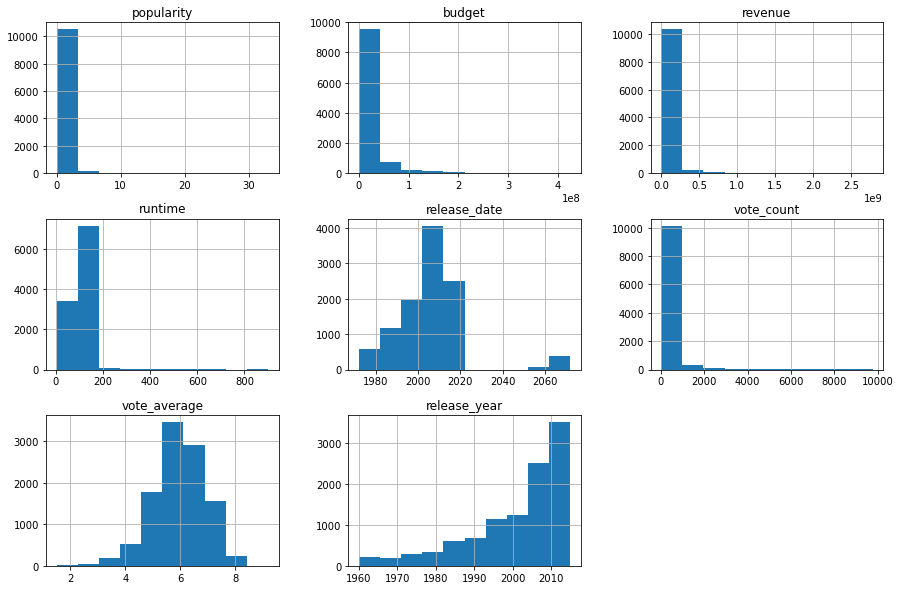

In [17]:
data_hist = df.hist(figsize=(15,10));

+ Histograms show 
    + right skewed distribution related to budget and revenue ..
    + left skewed distribution related to release year 
    + runtime may have outliers

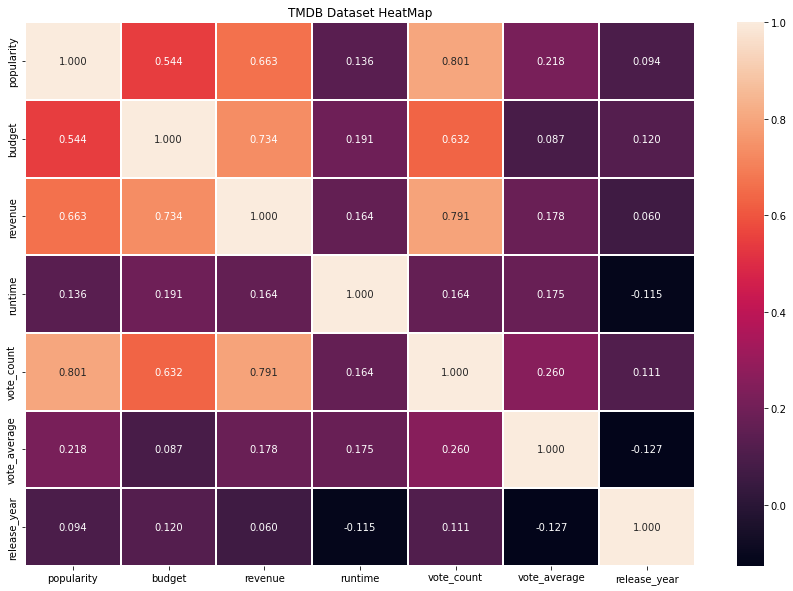

In [18]:
fig , ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True , linewidths=0.3, fmt='.3f', ax=ax)
ax.set_title('TMDB Dataset HeatMap');


+ Heatmap shows strong relation between 
    + (revennue, popularity, budget and votes)
    + (budget, votes and popularity)
    + (popularity and votes)

## 1-Release year questions 


#### 1.1-what is the describtion of movies release per year ? 

+ plotting the count of movies per year,  
+ Top ten years of movie release,  
+ Top and lowest year of movie release,  
+ The pattern of movie release per year.

The top 10 years of movie release are 
 2014    680
2013    644
2015    610
2012    572
2011    529
2009    524
2008    485
2010    475
2007    432
2006    403
Name: release_year, dtype: int64
The top year of movies release is 
 2014    680
Name: release_year, dtype: int64
The less year of movies release is 
 1969    30
Name: release_year, dtype: int64


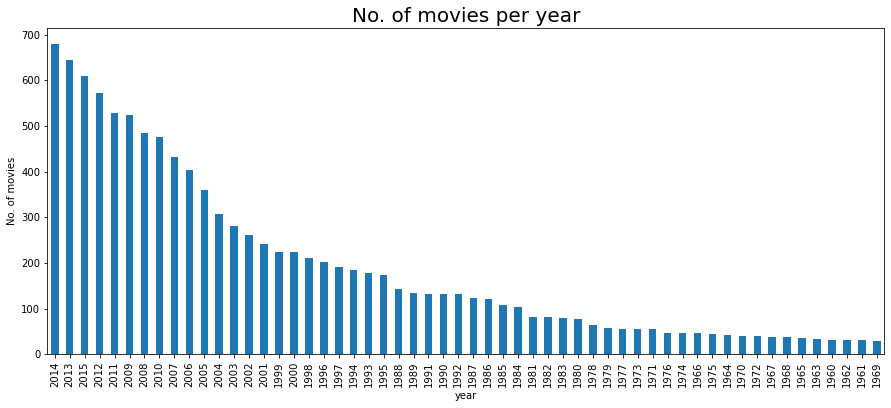

In [19]:
def movies_count_year(column1, t_title, x_title, y_title):
    
    movie_count = df[column1].value_counts()
    movie_count.plot(kind = 'bar', figsize=(15,6));
    plt.title(t_title, fontsize=20)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    print("The top 10 years of movie release are \n {}".format(movie_count.head(10)))
    print('The top year of movies release is \n {}'.format(movie_count.head(1)))
    print('The less year of movies release is \n {}'.format(movie_count.tail(1)))

movies_count_year('release_year', 'No. of movies per year', 'year', 'No. of movies')    

> From plot above, we can observe increasing in movie release per year ...

### 2-Release date questions 

#### 2.1-what is the most popular month for movie release? is there correlation with revenue?

+ plotting the count of movies per month,    
+ Top and lowest month of movie release,  

Top month of movies release 
 September    1318
Name: release_month, dtype: int64
Lowest month of movies release 
 February    679
Name: release_month, dtype: int64


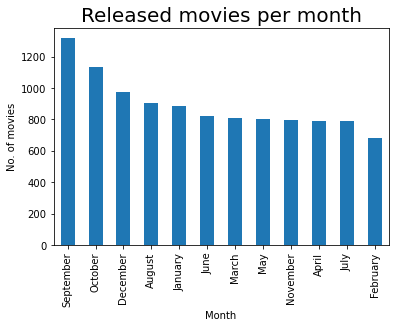

In [20]:
def movies_count_month(column1, t_title, x_title, y_title):
    
    movies_count= df[column1].value_counts()
    movies_count.plot(kind = 'bar', figsize=(6,4));
    plt.title(t_title, fontsize=20)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    print('Top month of movies release \n {}'.format(df.release_month.value_counts().head(1)))
    print('Lowest month of movies release \n {}'.format(df.release_month.value_counts().tail(1)))
    
movies_count_month('release_month', 'Released movies per month', 'Month', 'No. of movies')    


#### 2.2-IS there any relation between month of release and revenue?

+ plotting revenue aginst month of release after using groupby function on dataframe
  + N.B we will use revenue modified dataframe
+ Finding any patterns coreleate revenue and month of release  
  

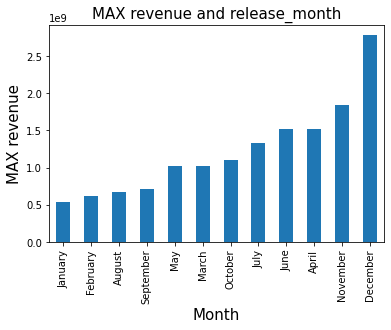

In [21]:
def month_revenue(dataframe,column1, column2):
    
    month_revenue = dataframe.groupby(column1)[column2].describe()
    month_revenue['max'].sort_values().plot.bar() 
    plt.title('MAX {} and {}'.format(column2, column1), fontsize=15)
    plt.xlabel('Month', fontsize=15)
    plt.ylabel('MAX {}'.format(column2), fontsize=15);
    
month_revenue(rev_df,'release_month', 'revenue')

>From revenue and month plot we find that **winter** months (December,november) have the **highest** revenue followed by summer season (april , june) ..

#### 2.3-IS there any relation between month of release and popularity?

+ plotting revenue aginst month of release after using groupby function on dataframe
+ Finding any patterns coreleate revenue and month of release

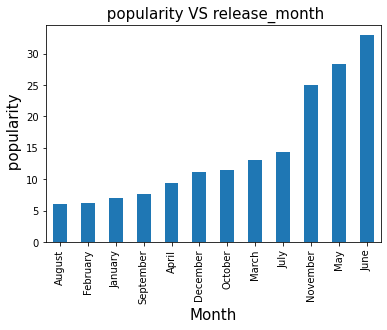

In [22]:
def month_popularity(column1, column2):
    
    month_pop= df.groupby(column1)[column2].describe()
    month_pop['max'].sort_values().plot.bar() 
    plt.title(' {} VS {}'.format(column2, column1), fontsize=15)
    plt.xlabel('Month', fontsize=15)
    plt.ylabel(' {}'.format(column2), fontsize=15);
    
month_popularity('release_month', 'popularity')

> From popularity and month plot we can find that movies of summer months have the highest popularity...

## 3-Runtime questions 


#### 3.1-Does movies run time change over years?

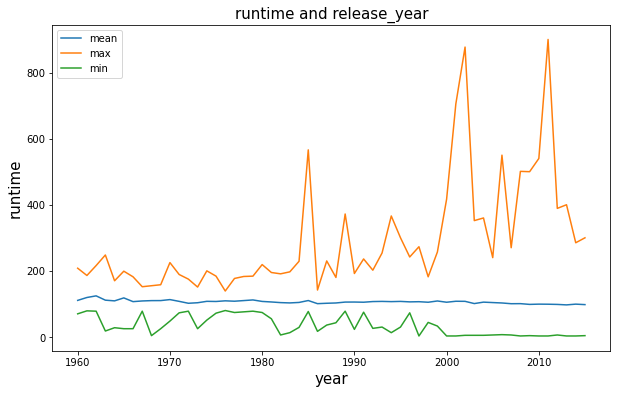

In [23]:
def runtime_year(column1, column2):
    
    time_year= df.groupby(column1)[column2].describe()
    fig, ax = plt.subplots(figsize = (10,6))
    ax.plot(time_year['mean'] , label = 'mean')
    ax.plot(time_year['max'], label= 'max')
    ax.plot(time_year['min'], label = 'min')
    plt.title('{} and {}'.format(column2, column1), fontsize=15)
    plt.xlabel('year', fontsize=15)
    plt.ylabel('{}'.format(column2), fontsize=15);
    plt.legend()
    
runtime_year('release_year', 'runtime')


>From plot of runtime and year we can find a slight decrease of runtime mean while max. values have outliers that reaches more 800 min. runtime.

#### 3.2-What is the longest and shortest movie ?

+ Using groupby function on movie title and runtime to extract longest and shortest movies. 

In [24]:
print('The longest movie runtime is \n',df.groupby('original_title')['runtime'].max().sort_values(ascending=False).head(1))
print('The shortest movie runtime is \n',df.groupby('original_title')['runtime'].min().sort_values().head(1))

The longest movie runtime is 
 original_title
The Story of Film: An Odyssey    900
Name: runtime, dtype: int64
The shortest movie runtime is 
 original_title
Shrek in the Swamp Karaoke Dance Party    3
Name: runtime, dtype: int64


## 4-Genres questions


> + converting values of genres column to unlisted row values with same original index using assign, str_split and explode function methods.
>+ + we will use the main, budget and modified revenue DataFrames during unlisting process where ***rev_genres_df*** and ***budg_genres_df*** will be used in revenue and budget related questions

In [25]:
#unlisting row values
df_genres = df.assign(genres=df.genres.str.split('|')).explode('genres') #Main genres dataframe
rev_genres_df = rev_df.assign(genres=df.genres.str.split('|')).explode('genres') #will be used with genres_revenue question
budg_genres_df = budg_df.assign(genres=df.genres.str.split('|')).explode('genres') #will be used with genres_revenue question

#### 4.1-What are the most watched  Genres over years?

+ plotting genres frequency distribution
+ Finding the pattern.

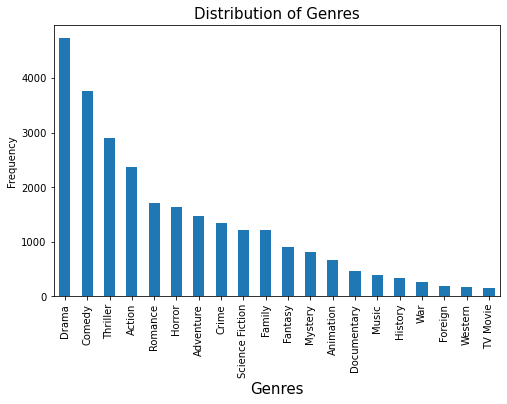

In [26]:
def genres_count(column):
    
    df_genres[column].value_counts().plot.bar(figsize=(8,5))
    plt.xlabel('Genres', fontsize=15)
    plt.ylabel('Frequency', fontsize=10)
    plt.title('Distribution of Genres', fontsize=15)
    
genres_count('genres')

> We can fin form genres distribution that the **most** produced Geres are **Drama** follwed by **Comedy** and **Thriller** movies.


>+ **We can go far and define the most common genres production per year and ploting the Frequency of the most common genres per year**  
>+ Using groupby function to execute genres against release year

In [27]:
#defining the most common genres per year
genres_per_year= df_genres.groupby('release_year').genres.describe()
genres_per_year.head(10)


,count,unique,top,freq
release_year,,,,
1960,78,16,Drama,13
1961,75,17,Drama,16
1962,82,17,Drama,21
1963,91,17,Drama,13
1964,111,18,Drama,20
1965,94,18,Drama,20
1966,119,18,Comedy,16
1967,96,17,Comedy,17
1968,91,17,Drama,19


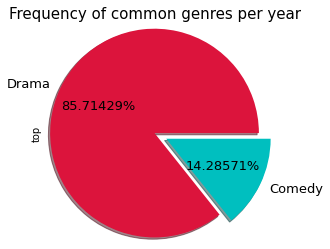

In [28]:
explode = [0, 0.15] 
colors = ['crimson', 'c']

#Using pie shart to visualise frequeny of the most common genres per year.
genres_per_year['top'].value_counts().plot(kind='pie', radius=1.2, shadow=True , explode=explode, colors=colors,
   startangle=0, autopct='%0.5f%%', fontsize= 13)
 
plt.title('Frequency of common genres per year', fontsize=15);

+ The data frame table of genres and release_year in addition to pie chart show that drame genres is the most relevan genre per year.

#### 4.2-Is there relation between Genres and Budget?

+ plotting Genres against Budget after using groupby function
   + N.B Using the modified budget Dataframe.
+ Finding any pattern between them.

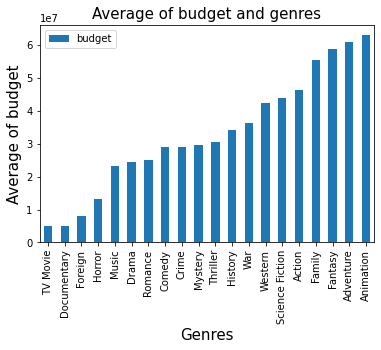

In [29]:
def genres_budget(column1, column2):
    
    genres_bud = budg_genres_df.groupby(column1)[column2].mean().sort_values()
    genres_bud.plot(kind= 'bar')
    plt.title('Average of {} and {}'.format(column2, column1), fontsize=15)
    plt.xlabel('Genres', fontsize=15)
    plt.ylabel('Average of {}'.format(column2), fontsize=15);
    plt.legend()
    plt.xticks(rotation=90)
    
genres_budget('genres', 'budget')

> + From _genres_ and _budget_ plot we can find that **Animation** followed by **Adventure** and **Fantasy** have the highest production budget.

#### 4.3-IS there any relation between Genres and Revenue?

+ plotting Genres against Revenue after using groupby function
   + N.B Using the modified revenue Dataframe.
+ Finding any pattern between them.

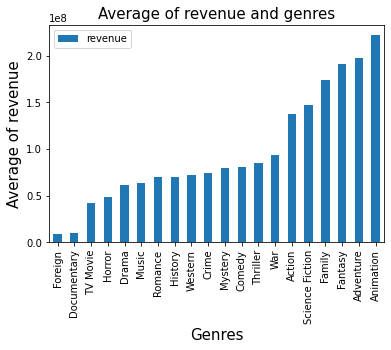

In [30]:
def genres_revenue(column1, column2):
    
    genres_rev = rev_genres_df.groupby(column1)[column2].mean().sort_values()
    genres_rev.plot(kind= 'bar')
    plt.title('Average of {} and {}'.format(column2, column1), fontsize=15)
    plt.xlabel('Genres', fontsize=15)
    plt.ylabel('Average of {}'.format(column2), fontsize=15);
    plt.legend()
    plt.xticks(rotation=90)
    
genres_revenue('genres', 'revenue')

> + From _genres_ and _revenue_ plot we can find that **Animation** followed by **Adventure** and **Fantasy** have the highest production budget.

## 5-Cast questions

In [31]:
#unlisting cast for each movie...
df_cast = df.assign(cast=df.cast.str.split('|')).explode('cast') #main Dataframe

rev_cast_df = rev_df.assign(cast=df.cast.str.split('|')).explode('cast') #modified revenue dataframe



#### 5.1-who are the top ten actors/actress participated in movies?

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
Name: cast, dtype: int64


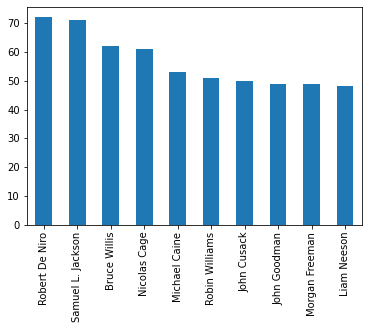

In [32]:
#top ten actors/actress participated in movies...
def cast_count():
    
    df_cast.cast.value_counts().head(10).plot(kind='bar')
    print(df_cast.cast.value_counts().head(10))
    
cast_count()

#### 5.2-Is there any relation between cast and revenue?who are the top ten cast achieving revenue?

> + Plotting cast against revenue using groupby function in formulationg data
>   + N.B Using modified revenue formula 
> + Finding any relation between cast and revenue.   



Top 10 actors/actress making revenue cast
Harrison Ford        8922840695
Tom Cruise           8812436186
Tom Hanks            8418142612
Emma Watson          8176916698
Ian McKellen         8115046043
Johnny Depp          7979521265
Daniel Radcliffe     7863036755
Rupert Grint         7696691044
Robert Downey Jr.    7419289468
Ralph Fiennes        7135927496
Name: revenue, dtype: int64


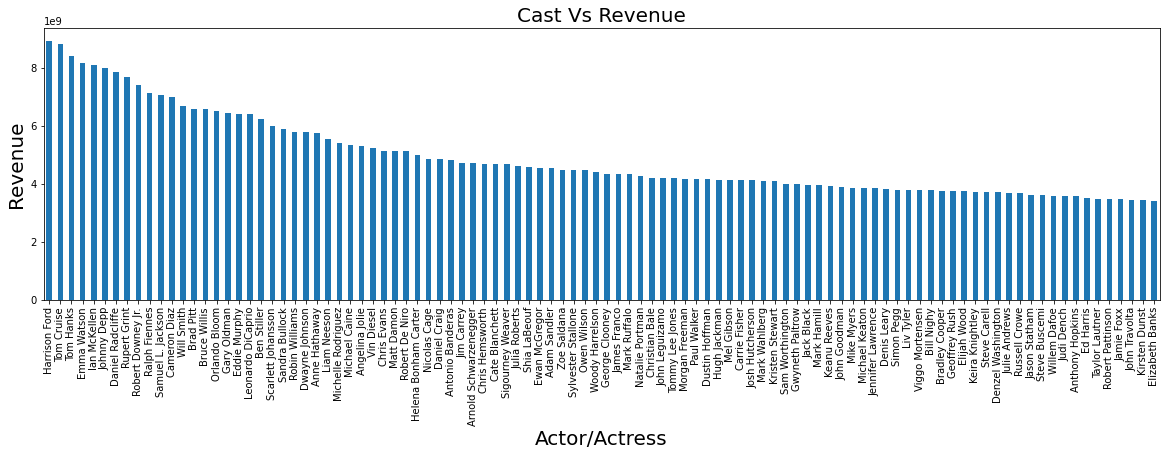

In [33]:
#any relation between actors and revenue...
def cast_revenue(column1 , column2):
    
    cast_rev = rev_cast_df.groupby(column1)[column2].sum().sort_values(ascending=False)
    cast_rev.head(100).plot(kind = 'bar', figsize=(20,5))
    plt.title('Cast Vs Revenue', fontsize =20)
    plt.xlabel('Actor/Actress', fontsize =20)
    plt.ylabel('Revenue', fontsize = 20);
    print('Top 10 actors/actress making revenue', cast_rev.head(10))
    
cast_revenue('cast', 'revenue')

> + From the cast vs revenue plot we find positive relation between cast and revenue.
> + small number pf actor/actress acheiving the highest revenue.
> + Actually, we can divide actor/actress into slices related to the achieved revenue.
> + top 10 actors/actress making revenue 
    1. Harrison Ford  >>          8922840695
    1. Tom Cruise     >>          8812436186
    1. Tom Hanks      >>          8418142612
    1. Emma Watson    >>          8176916698
    1. Ian McKellen   >>          8115046043
    1. Johnny Depp    >>          7979521265
    1. Daniel Radcliffe >>        7863036755
    1. Rupert Grint   >>          7696691044
    1. Robert Downey Jr.>>        7419289468
    1. Ralph Fiennes  >>          7135927496

## 6-Directors questions

#### 6.1-who are the top ten directors participated in movies?

plotting number of directed movies for each director.

Top 10 directors making movies are 
 Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      28
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64


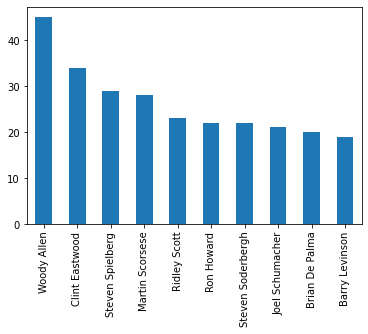

In [34]:
#top ten directors participated in movies...
def director(column):
    
    df[column].value_counts().head(10).plot(kind='bar')
    print('Top 10 directors making movies are \n',df[column].value_counts().head(10))
    
director('director')

+ Top 10 directors making movies are 
    1. Woody Allen          45
    2.Clint Eastwood       34
    3. Steven Spielberg     29
    4. Martin Scorsese      28
    5. Ridley Scott         23
    6. Ron Howard           22
    7. Steven Soderbergh    22
    8. Joel Schumacher      21
    9. Brian De Palma       20
    10. Barry Levinson       19

#### 6.2-Is there any relation between director and revenue? who are the top 10 directors with high revenue? 

> + Plotting Director against Revenue using groupby function in formulationg data
>   + N.B Using modified revenue formula 
> + Finding any relation between Director and revenue. 

top 10 directors with high revenue director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3665414624
Ridley Scott         3649996480
Name: revenue, dtype: int64


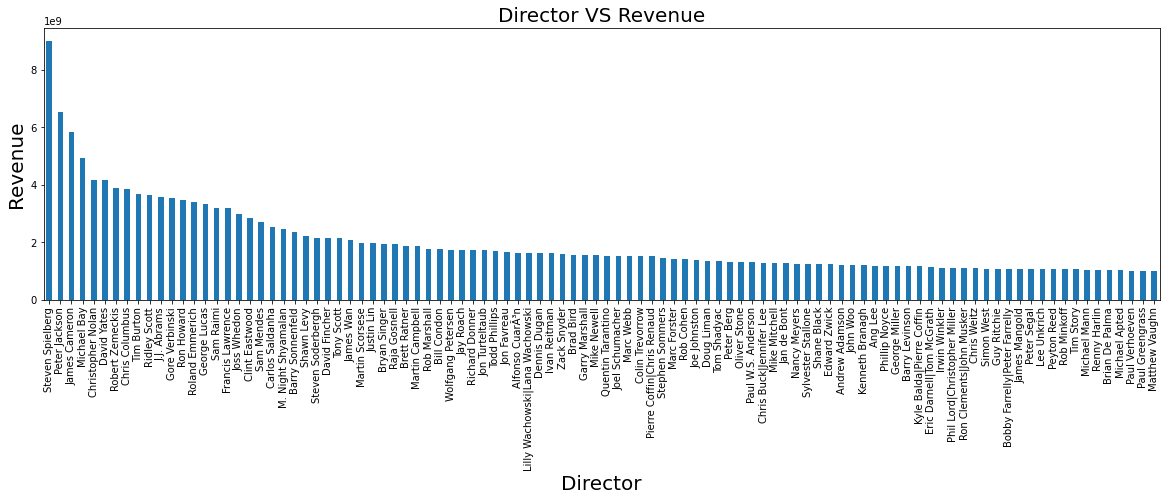

In [35]:
#any relation between Director and revenue ...
def director_revenue(column1 , column2):
    
    director_rev = rev_df.groupby(column1)[column2].sum().sort_values(ascending=False)
    director_rev.head(100).plot(kind = 'bar', figsize=(20,5))
    plt.title('Director VS Revenue', fontsize =20)
    plt.xlabel('Director', fontsize =20)
    plt.ylabel('Revenue', fontsize = 20);
    print('top 10 directors with high revenue', director_rev.head(10))
    
director_revenue('director', 'revenue')

+ From the director vs revenue plot we find positive relation between director and revenue.
> + small number pf directors acheiving the highest revenue.
> + Actually, we can divide directors into slices related to the achieved revenue.
> + top 10 directors making revenue
      1. Steven Spielberg>>     9018563772
      1. Peter Jackson     >>   6523244659
      1. James Cameron       >> 5841894863
      1. Michael Bay  >>        4917208171
      1. Christopher Nolan >>   4167548502
      1. David Yates  >>        4154295625
      1.Robert Zemeckis >>     3869690869
      1. Chris Columbus >>      3725631503
      1.Tim Burton      >>     3665414624
      1.Ridley Scott    >>     3584430808
   


#### 6.3-Is there any relation between director and rating? who are thetop 10 directors with high movie ratings?

>+ Plotting Director against Rating using groupby function in formulationg data
>
>+ Finding any relation between Director and movie rating.

Top 10 directors with high movie rating director
Mark Cousins                            9.2
Carl Tibbetts                           8.8
David Mallet                            8.7
Stan Lathan                             8.5
Martin Scorsese|Michael Henry Wilson    8.5
Curt Morgan                             8.5
Saul Swimmer                            8.5
Sam Dunn|Scot McFadyen                  8.4
Jorge RamÃ­rez SuÃ¡rez                  8.4
Jonathan Demme                          8.4
Name: vote_average, dtype: float64


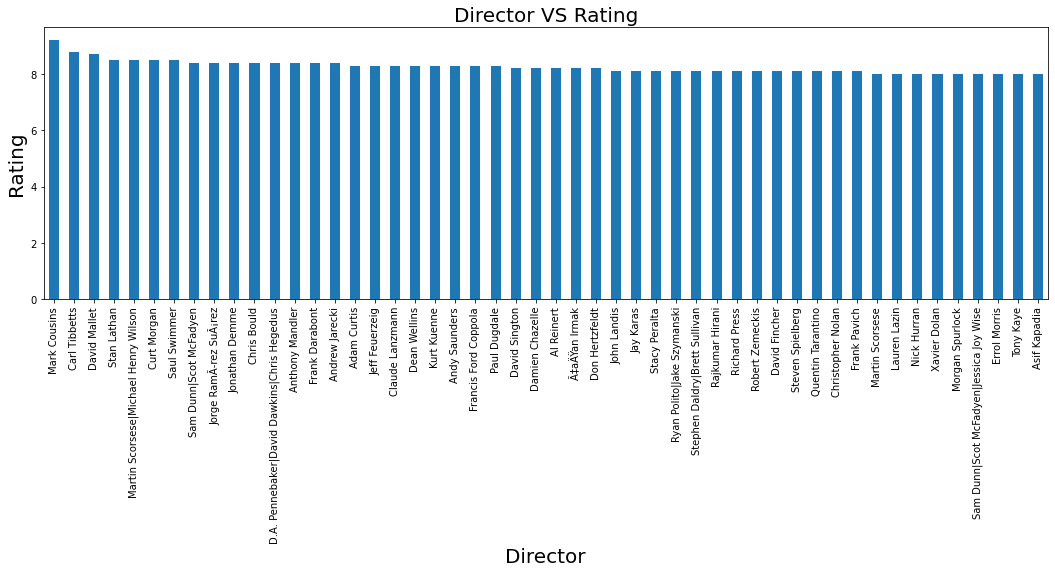

In [36]:
#any relation between Director and rating ...
def director_rating(column1 , column2):
    
    director_rat= df_cast.groupby(column1)[column2].max().sort_values(ascending=False)
    director_rat.head(50).plot(kind = 'bar', figsize=(18,5))
    plt.title('Director VS Rating', fontsize =20)
    plt.xlabel('Director', fontsize =20)
    plt.ylabel('Rating', fontsize = 20)
    print('Top 10 directors with high movie rating',director_rat.head(10))
    
director_rating('director', 'vote_average')

> Inspection of the plot of all datast directors shows a positive relation between director names and movie ratings.
>+ The top 10 directors with high movie rating director
     1.Top 10 directors with high movie rating director
1. Mark Cousins   ...                         9.2
1. Carl Tibbetts     ...                      8.8
1. David Mallet         ...                   8.7
1. Stan Lathan             ...                8.5
1. Martin Scorsese|Michael Henry Wilson ...   8.5
1. Curt Morgan     ...                        8.5
1. Saul Swimmer       ...                     8.5
1. Sam Dunn|Scot McFadyen ...                 8.4
1. Jorge RamÃ­rez SuÃ¡rez    ...              8.4
1. Jonathan Demme               ...           8.4

## 7-Revenue questions

####  7.1-what are the top 10 movies with highest revenue?

>+ Plotting revnue against Movies using groupby function in data formulation
     + N.B Using revenue modified dataframe.
>+ Finding Top 10 movies with the highest revenue.

In [37]:
def top_revenue():
    
    revenue_movie = rev_df.groupby('original_title').revenue.max().sort_values(ascending=False)
    print('Top 10 highest revenue movies', revenue_movie.head(10))
    
top_revenue()    

Top 10 highest revenue movies original_title
Avatar                                          2781505847
Star Wars: The Force Awakens                    2068178225
Titanic                                         1845034188
The Avengers                                    1519557910
Jurassic World                                  1513528810
Furious 7                                       1506249360
Avengers: Age of Ultron                         1405035767
Harry Potter and the Deathly Hallows: Part 2    1327817822
Frozen                                          1274219009
Iron Man 3                                      1215439994
Name: revenue, dtype: int64


#### 7.2-Is there any proportional pattern between Revenue and budget?

>+ plotting a scatter relation between revenue and budget to find any proportional pattern.
>    + N.B .. Using modified revenue-budget dataframe.

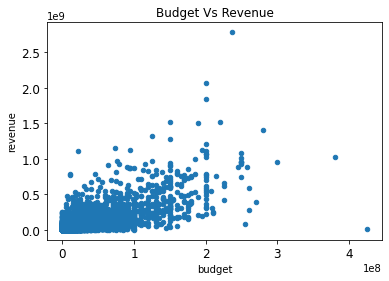

In [38]:
#relation btw revenue and budget...
def budget_revenue():
    
    rev_df.plot(x = 'budget', y = 'revenue', kind='scatter', fontsize=12)
    plt.title('Budget Vs Revenue')
    
    
budget_revenue()    

>+ Revenue-budget scatter plot shows a direct proportional pattern.

####  7.3-Is there any proportional pattern between Revenue and popularity?

>+ plotting a scatter relation between revenue and popularity to find any proportional pattern.
>    + N.B .. Using modified revenue-budget dataframe.

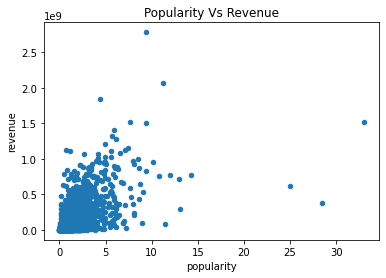

In [39]:
def popularity_revenue():
    
    rev_df.plot(x = 'popularity', y = 'revenue', kind='scatter')
    plt.title('Popularity Vs Revenue')
    
    
popularity_revenue()

>+ Revenue-popularity scatter plot shows a direct proportional pattern.

#### 7.4-Is there any proportional pattern between Revenue and votes?

>+ plotting a scatter relation between revenue and votes to find any proportional pattern.
>    + N.B .. Using modified revenue-budget dataframe.

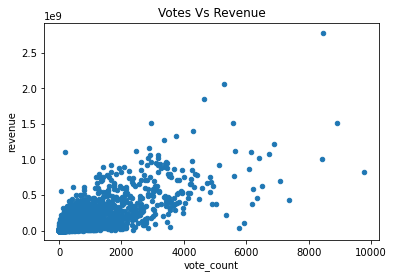

In [40]:
def votes_revenue():
    
    rev_df.plot(x = 'vote_count', y = 'revenue', kind='scatter')
    plt.title('Votes Vs Revenue')
    
    
votes_revenue()

>+ Revenue-votes scatter plot shows a direct proportional pattern.

#### 7.5-Is there any proportional pattern between Revenue and Rating?

>+ plotting a scatter relation between revenue and votes to find any proportional pattern.
>    + N.B .. Using modified revenue-budget dataframe.

In [41]:
def vote_average_revenue():
    
    rev_df.plot(x = 'vote_average', y = 'revenue', kind='scatter')
    plt.title('Votes Vs Revenue')
    
vote_average_revenue

<function __main__.vote_average_revenue()>

>+ Revenue-votes scatter plot shows a direct proportional pattern.
>+ **High** *bugdet*, *votes*, *rating* and *popularity* means **high** revenue gain.


## 8-Budget questions

####  8.1-what are the top 10 movies with highest Budget?

>+ Plotting budget against Movies using groupby function in data formulation
     + N.B Using budget modified dataframe.
>+ Finding Top 10 movies with the highest budget.

In [42]:
def top_budget():
    budget_movie = budg_df.groupby('original_title').budget.max().sort_values(ascending=False)
    print('Top 10 highest budget movies', budget_movie.head(10))
top_budget()

Top 10 highest budget movies original_title
The Warrior's Way                              425000000
Pirates of the Caribbean: On Stranger Tides    380000000
Pirates of the Caribbean: At World's End       300000000
Avengers: Age of Ultron                        280000000
Superman Returns                               270000000
John Carter                                    260000000
Tangled                                        260000000
Spider-Man 3                                   258000000
The Lone Ranger                                255000000
Harry Potter and the Half-Blood Prince         250000000
Name: budget, dtype: int64


#### 8.2-Is there any proportional pattern between budget and popularity?

>+ plotting a scatter relation between budget and popularity to find any proportional pattern.
>    + N.B .. Using modified budget dataframe.

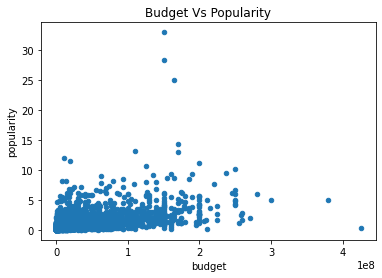

In [43]:
def budget_popularity():
    
    budg_df.plot(x = 'budget', y = 'popularity', kind='scatter')
    plt.title('Budget Vs Popularity')
    

budget_popularity()

>+ Budget-popularity scatter plot shows a direct proportional pattern.


####  8.3-Is there any proportional pattern between budget and votes?

>+ plotting a scatter relation between budget and votes to find any proportional pattern.
>    + N.B .. Using modified budget dataframe.

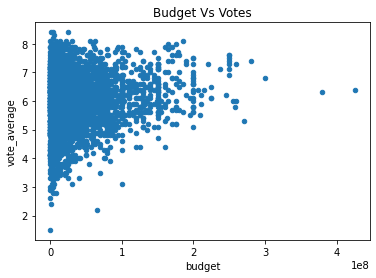

In [44]:
def budget_votes():
    
    budg_df.plot(x = 'budget', y = 'vote_average', kind='scatter')
    plt.title('Budget Vs Votes')
    
    
budget_votes()

>+ Budget-votes scatter plot shows a direct proportional pattern.


#### 8.4-Is there any proportional pattern between budget and release year?


>+ plotting a scatter relation between budget and release_year to find any proportional pattern.
>    + N.B .. Using modified budget dataframe.

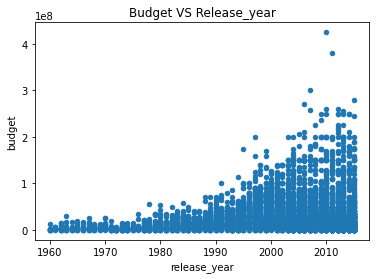

In [45]:
def budget_release_year():
    
    budg_df.plot(x = 'release_year', y = 'budget', kind='scatter')
    plt.title('Budget VS Release_year')
    
    
budget_release_year()

>+ Budget-release_year scatter plot shows a direct proportional pattern.
>+ in comparison with past decades, there is a large increase in movie budgets.
>+ popularity, votes and revenues has a direct proportional pattern with budget.



## 9-production companies questions

#### 9.1-what are top companies partcipated in movies production?

> Using pro_comp_df modified dataframe

Top companies partcipated in movies production
 Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       75
Columbia Pictures                          72
Metro-Goldwyn-Mayer (MGM)                  72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
Name: production_companies, dtype: int64


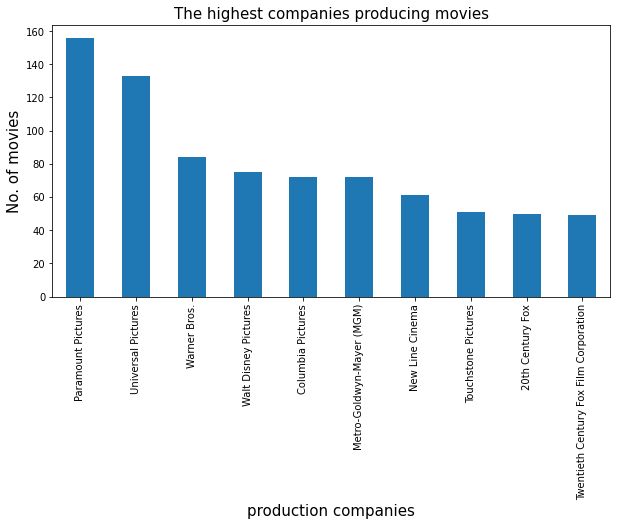

In [46]:
def production_count():
    pro_count = pro_comp_df.production_companies.value_counts().head(10)
    pro_count.plot(kind='bar',figsize = (10,5), fontsize= 10)
   
    plt.title('The highest companies producing movies',fontsize= 15)
    plt.xlabel('production companies',fontsize= 15)
    plt.ylabel('No. of movies', fontsize =15)
    print('Top companies partcipated in movies production\n', pro_count)
    
production_count()    

#### 9.2-Is there any relation between production companies and budget?

>+ Plotting budget against Production companies using groupby function in data formulation
     + N.B Using production_budget modified dataframe.

Top ten production companies budget production_companies
Boram Entertainment Inc.                                                                                              425000000
Walt Disney Pictures|Jerry Bruckheimer Films|Moving Picture Company (MPC)                                             380000000
Walt Disney Pictures|Jerry Bruckheimer Films|Second Mate Productions                                                  300000000
Marvel Studios|Prime Focus|Revolution Sun Studios                                                                     280000000
DC Comics|Legendary Pictures|Warner Bros.|Bad Hat Harry Productions                                                   270000000
Walt Disney Pictures|Walt Disney Animation Studios                                                                    260000000
Walt Disney Pictures                                                                                                  260000000
Columbia Pictures|Laura Ziskin Productions|Marv

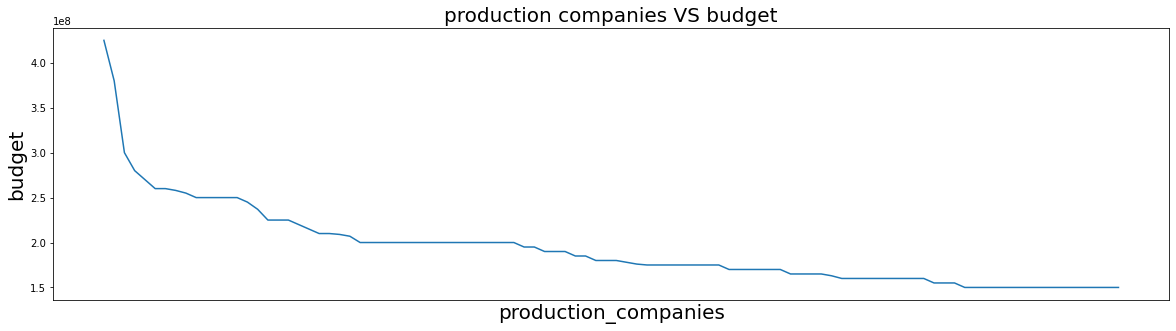

In [47]:
def production_budget(column1 , column2):
    
    pro_budget = pro_budg_df.groupby(column1)[column2].max().sort_values(ascending=False)
    pro_budget.head(100).plot(kind = 'line', figsize=(20,5))
    plt.title('production companies VS budget', fontsize =20)
    plt.xlabel(column1, fontsize =20)
    plt.ylabel(column2, fontsize = 20)
    plt.xticks([],rotation = 90)
    print('Top ten production companies budget',pro_budget.head(10))
production_budget('production_companies', 'budget')

>+ some companies' names have the ability to vontribute with high production budget if compared with others..
>+ production companies may affect other variables like revenue popularity and also profits.

#### 9.3-Is there any relation between production companies and revenue?

>+ Plotting revenue against Production companies using groupby function in data formulation
     + N.B Using production_revenue modified dataframe.

Top ten production companies revenue production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2781505847
Lucasfilm|Truenorth Productions|Bad Robot                                                                     2068178225
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            1845034188
Marvel Studios                                                                                                1519557910
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                      1513528810
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                                   1506249360
Marvel Studios|Prime Focus|Revolution Sun Studios                                                             1405035767
Warner Bros.|Heyday Films|Moving Picture Company (MPC)                                         

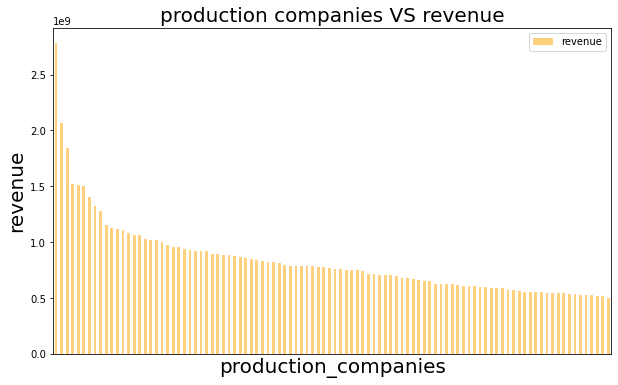

In [48]:
def production_revenue(column1 , column2):
    
    pro_budget = pro_rev_df.groupby(column1)[column2].max().sort_values(ascending=False)
    pro_budget.head(100).plot(kind='bar',alpha=0.5, color= 'orange', figsize=(10,6))
    plt.legend();
    plt.title('production companies VS revenue', fontsize =20)
    plt.xlabel(column1, fontsize =20)
    plt.ylabel(column2, fontsize = 20)
    plt.xticks([],rotation = 45)
    print('Top ten production companies revenue',pro_budget.head(10))
    
production_revenue('production_companies', 'revenue')

> From above plots we can find companies with high ability to offer budgets and also to gain revenue an profits..


<a id='conclusions'></a>
## Conclusions

+ **After investigation of TDMb dataset, The following conclusions cann be enumerated:**
    1. Movie release increases with time . 
    2. The highest year of movie release is 2014 with about 680 movies.
    3. The highest month of movie release is September. October, December (winter season) 
    4. Winter season (December and November) followed by summer season (June and July ) have the highest revenue over time.
    5. Summer released movies (June-may) have the most popularity over time.
    6. Average Runtime of movies seems to be fixed through time with some values appeared as outliers like a movie of about 900 min and on other hand one of 3 min run time.
    7. The highest produced genres over time are drama followed comedy and Thriller.
    8. The highest genres making revenues are animation , adventure and fantasy and also  
       The highest genres consuming budgets are animation, adventure and fantasy(the same)
    9. Movies high revenue may be related to the names of some actor/actress like Tom Cruis, Tom Hanks and Harrison Ford and  seems to be positive relation with the names of movie stars
    10. Director names like Steven Spielberg and Ridly Scott are in the list of Top 10 directors making movies and the list of Top 10 directors achieving revenues and also seems to be a positive relation between them.
    11. The highest movies achieving revenue are avatar, Star Wars and Titanic.
    12. From scatterplots we found that Revenue directly proportional with budget,  popularity,  votes and rating.
    13. Budget scatterplots shows also a direct proportional pattern with popularity votes and release year.
    14. The highest  movies consumed budgets are The warrior way and The Pirates of Caribbean.
    15. Regarding participation in movies production, paramount pictures comes in the first place followed by Universal pictures and warner Bros.
    16. Walt Disney and warner Bros. are listed in the list of the highest production companies spending budgets and gain revenues and seems to be a  relative positive relation between these variables.
    
    
>+ After enumerating most of findings, the relation between these variables seems to be **crossed** and their effect widely extend to each other.
>+ The main features that may affect success of movies are The **budget** , **popularity** , **votes** , some **cast** name and also **directors** also the **production company** has a big rule and the time of release ,so making  good variable choices according to analysis may lead to the highest revenue, profit and success.

<a id='limitations'></a>
## Limitations

>+ **The main obstacle in dealing with TDMb dataset was The missing data in form of null and zero values.**
>+In case of dropping all missed data, that will lead to loss of about 60% - 70% of data that will affects badly the >consistancy of dataset and quality of analysis operation.
>+ To overcome this obstacle, restructuring dataset to number of different data frame that reply the needs of  every analysis situation
>+ Analysis of variables having the highest missed data and its relation with others will proceed through a low population power reepresents less than 50% of main power in comparison with analysis of variables with no missed data will lead to weak analysis results.
>+ Using Mean may overcomes the obstacle but other relations like max, min , value_counts willbe affected badly.





<a id='refrences'></a>
## Refrences

>+ **Information resources**
    + Udacity literatures
    + Python standard  library
    + Python documentation 
    + Pandas documentation
    + Online web sites like (python, stackoverflow, oreilly, geeksforgeeks)

>+ **Links for web pages I have used:**
    + https://stackoverflow.com/questions/8916302/selecting-across-multiple-columns-with-python-pandas
    + https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
    + https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html
    + https://datascienceparichay.com/article/pandas-split-column-by-delimiter/
    + https://www.geeksforgeeks.org/convert-list-like-column-elements-to-separate-rows-in-pandas/
    + https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html?highlight=scatter%20matrix
    + https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
    + https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
    + https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html
    + https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element
    + https://www.geeksforgeeks.org/convert-list-like-column-elements-to-separate-rows-in-pandas/
    + https://stackoverflow.com/questions/37600711/pandas-split-column-into-multiple-columns-by-comma
    + https://stackoverflow.com/questions/8916302/selecting-across-multiple-columns-with-python-pandas